In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
from sklearn.linear_model import LinearRegression

import pandas as pd
from sklearn import metrics
from scipy import stats

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
dataset= pd.read_csv('/content/drive/My Drive/DS_Project/ML_dataframe.csv', encoding= 'latin1')

In [4]:
x= dataset.Precipitation.values 
a= x[27375:36500]
n_data_points = len(x)
arr = np.array(x).reshape(n_data_points)

In [5]:
dataset = np.empty((27370,6)) 

for i in range(27365):
    dataset[i] = arr[i:i+6]  

np.random.shuffle(dataset)
n_training_points = 27375

X_train, y_train = dataset[:n_training_points,:5], dataset[:n_training_points,5]



In [6]:
dataset_test = np.empty((9120,6)) 

for i in range(9115):
    dataset_test[i] = arr[i:i+6]  

np.random.shuffle(dataset_test)
n_testing_points = 27375

X_test, y_test = dataset_test[:n_testing_points,:5], dataset_test[:n_testing_points,5]


In [7]:
reg = LinearRegression()

# Fit the training data
reg.fit(X_train, y_train)

# Make predictions on the test data
lr_pred = reg.predict(X_test)



In [8]:
print('MSE: ', metrics.mean_squared_error(y_test, lr_pred))
print('MAE: ', metrics.mean_absolute_error(y_test, lr_pred))
print('R2: ', metrics.r2_score(y_test, lr_pred))
print('Correlation: ', stats.pearsonr(y_test, lr_pred)[0])
print('RMSLE: ',metrics.mean_squared_log_error(np.absolute(y_test), np.absolute(lr_pred)))
print('MAPE: ',metrics.mean_absolute_percentage_error(y_test, lr_pred))

MSE:  64.16212678540434
MAE:  4.7999270943689165
R2:  0.017255270926516797
Correlation:  0.13174159279989772
RMSLE:  1.5563119545737607
MAPE:  16820011605772.611


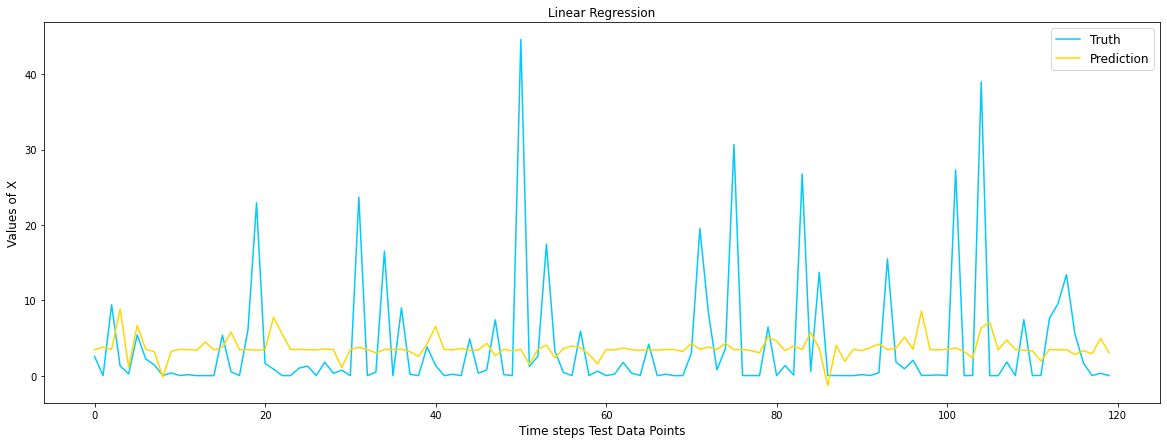

In [9]:
plt.figure(figsize=(20,7))
plt.plot(y_test[9000:9120], label='Truth',color='#03cafc')
plt.plot(lr_pred[9000:9120], label='Prediction',color='gold')

plt.ylabel('Values of X', fontsize=12)
plt.xlabel('Time steps Test Data Points', fontsize=12)
plt.title('Linear Regression')
plt.legend(fontsize=12)
# plt.ylim(-20,25)
plt.show()

In [10]:
!pip install --user setuptools --upgrade


     |████████████████████████████████| 952 kB 5.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [11]:
!pip install --user tensorflow

In [12]:
!pip install --user keras

In [13]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras.optimizers import Adam, SGD


In [14]:
# Initialize the model 
model = Sequential()

# Add first hidden layer 
model.add(Dense(64, activation='relu', input_shape=(5,)))

# Add second hidden layer
model.add(Dense(32, activation='relu'))
 
# Add an output layer 
model.add(Dense(1))

In [15]:
optimizer = Adam(lr=0.003)
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
epochs = 50
batch_size = 64

history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1)


Epoch 1/50
343/343 [==============================] - 2s 3ms/step - loss: 62.6590 - mae: 4.5117 - val_loss: 64.5256 - val_mae: 4.5665
Epoch 2/50
343/343 [==============================] - 1s 2ms/step - loss: 60.4869 - mae: 4.6370 - val_loss: 66.5618 - val_mae: 4.2015
Epoch 3/50
343/343 [==============================] - 1s 2ms/step - loss: 59.8658 - mae: 4.5897 - val_loss: 63.7600 - val_mae: 4.8404
Epoch 4/50
343/343 [==============================] - 1s 2ms/step - loss: 59.4866 - mae: 4.5775 - val_loss: 63.0774 - val_mae: 4.6529
Epoch 5/50
343/343 [==============================] - 1s 2ms/step - loss: 59.1833 - mae: 4.5679 - val_loss: 63.6648 - val_mae: 4.9917
Epoch 6/50
343/343 [==============================] - 1s 2ms/step - loss: 59.1780 - mae: 4.5622 - val_loss: 63.0738 - val_mae: 4.6969
Epoch 7/50
343/343 [==============================] - 1s 2ms/step - loss: 59.1207 - mae: 4.5546 - val_loss: 62.9672 - val_mae: 4.8483
Epoch 8/50
343/343 [==============================] - 1s 2ms/s

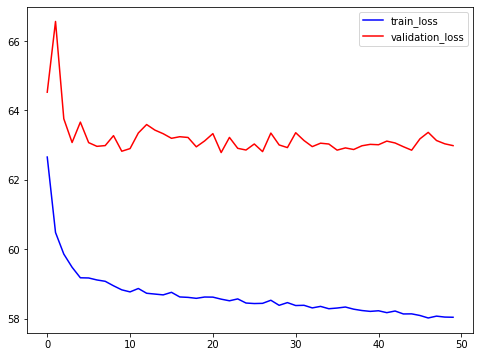

In [17]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], 'b', label='train_loss')
plt.plot(history.history['val_loss'], 'r', label='validation_loss')
plt.legend()


In [18]:
dnn_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test)

print(f'MSE: {score[0]}')
print(f'MAE: {score[1]}')
print('R2: ', metrics.r2_score(y_test, dnn_pred, sample_weight=None, multioutput='uniform_average'))
print('Correlation: ', stats.pearsonr(y_test, dnn_pred[:,0])[0])


print('RMSLE: ',metrics.mean_squared_log_error(np.absolute(y_test), np.absolute(dnn_pred[:,0])))
print('MAPE: ',metrics.mean_absolute_percentage_error(y_test, dnn_pred[:,0]))

285/285 [==============================] - 1s 2ms/step - loss: 61.7221 - mae: 4.4984
MSE: 61.72208786010742
MAE: 4.498388290405273
R2:  0.054627901404560086
Correlation:  0.23813363506538304
RMSLE:  1.3681069436474411
MAPE:  10601747439494.494


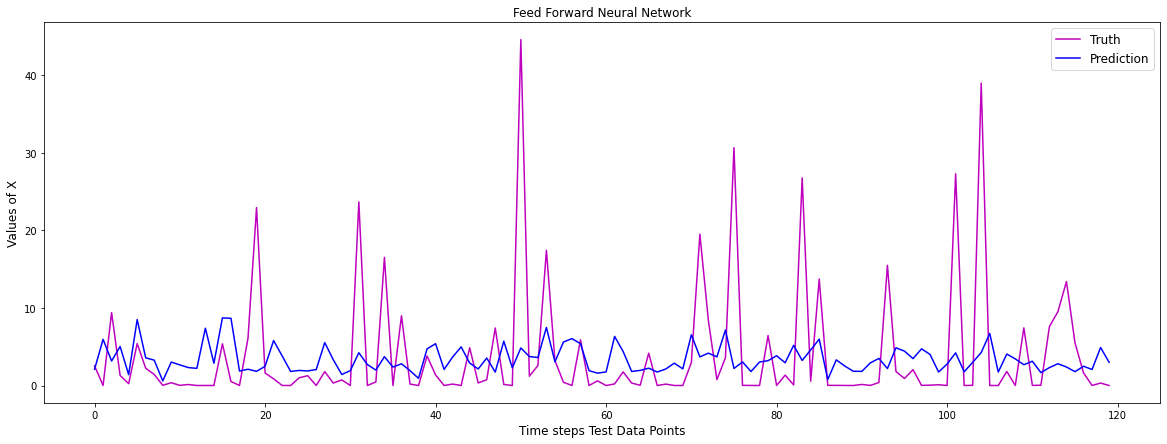

In [19]:
plt.figure(figsize=(20,7))
plt.plot(y_test[9000:9120],'m',label='Truth')
plt.plot(dnn_pred[9000:9120],'b', label='Prediction')
plt.ylabel('Values of X', fontsize=12)
plt.xlabel('Time steps Test Data Points', fontsize=12)
plt.title('Feed Forward Neural Network')
plt.legend(fontsize=12)
plt.show()